In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import scipy as scp
import yfinance as yfin
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
port = pd.read_excel('Port.xlsx', parse_dates =[15])
port = port.rename(columns=port.loc[8])
port = port.drop(np.arange(0,12)).reset_index(drop=True)
port = port[port['Position'].notna()].reset_index(drop=True)

cols = []
count = 1
for column in port.columns:
    if column == 'Price':
        cols.append(f'Price_{count}')
        count+=1
        continue
    cols.append(column)
port.columns = cols
port = port.sort_values('ID').reset_index(drop = True)
port
#note that Price_1 is the current price as of the Bloomberg pull, and Price_2 is the Price we bought at

,Security,PK,ID,Position,Price_1,PCS,FX Rate,Principal,Accrued,Market Val,Price_2,FX Rate,Principal,Accrued,Cost Val,Cost Date
0,AMRC US,AMRC US Equity,AMRC,140,55.1,EXCH,1,7714,NaN,7714,55,1,7700,NaN,7700,12/22/22
1,DAR US,DAR US Equity,DAR,175,66.85,EXCH,1,11698.75,NaN,11698.75,67.31,1,11779.57,NaN,11779.57,11/29/22
2,ETR US,ETR US Equity,ETR,140,105.76,EXCH,1,14803.6,NaN,14803.6,103.93,1,14550.2,NaN,14550.2,02/13/23
3,GPP US,GPP US Equity,GPP,1200,13.05,EXCH,1,15660,NaN,15660,12.27,1,14726.86,NaN,14726.86,11/23/22
4,ICLN US,ICLN US Equity,ICLN,870,19.87,EXCH,1,17286.9,NaN,17286.9,17.84,1,15520.45,NaN,15520.45,10/13/22
5,MVST US,MVST US Equity,MVST,1000,1.53,EXCH,1,1530,NaN,1530,1.96,1,1957.7,NaN,1957.7,12/09/22
6,STEM US,STEM US Equity,STEM,350,9.15,EXCH,1,3202.5,NaN,3202.5,10.55,1,3690.75,NaN,3690.75,12/09/22


In [3]:
port_assets = list(port['ID'])
today = datetime.today().strftime('%Y-%m-%d')
start_date = "2023-01-17"
start_date = datetime.strptime(start_date,'%Y-%m-%d')
tradingdays = 252
yfin.pdr_override()
df = pdr.get_data_yahoo(port_assets, start = start_date, end = today)
df = df['Adj Close'].dropna()
port['Cost Date']=pd.to_datetime(port['Cost Date'])

#temp = []
# for key in port['Cost Date']:
#      temp.append((df.keys()[0].year - key.year) * 12 + (df.keys()[0].month - key.month))

port['Time Delta'] = ((datetime.today() - port['Cost Date'])/np.timedelta64(1, 'M'))
#port['Time Delta'] = temp
df

[*********************100%***********************]  7 of 7 completed


,AMRC,DAR,ETR,GPP,ICLN,MVST,STEM
Date,,,,,,,
2023-01-17,60.900002,66.699997,105.826729,12.774137,21.360001,1.720,10.37
2023-01-18,61.200001,64.610001,106.499832,12.803147,21.110001,1.730,10.28
2023-01-19,59.520000,64.610001,105.915817,12.822488,20.400000,1.630,9.89
2023-01-20,61.750000,65.629997,106.351364,12.861168,20.600000,1.650,10.22
2023-01-23,64.260002,66.230003,105.668350,13.151269,20.969999,1.690,10.75
2023-01-24,64.139999,64.589996,106.183075,13.025558,20.809999,1.660,9.94
2023-01-25,63.070000,66.040001,106.410751,13.122258,20.639999,1.650,9.80
2023-01-26,62.919998,66.900002,107.370926,13.218960,20.629999,1.600,9.57
2023-01-27,64.580002,65.360001,107.608490,13.199619,20.530001,1.560,9.86


In [4]:
df.reset_index(drop = True)

,AMRC,DAR,ETR,GPP,ICLN,MVST,STEM
0,60.900002,66.699997,105.826729,12.774137,21.360001,1.720,10.37
1,61.200001,64.610001,106.499832,12.803147,21.110001,1.730,10.28
2,59.520000,64.610001,105.915817,12.822488,20.400000,1.630,9.89
3,61.750000,65.629997,106.351364,12.861168,20.600000,1.650,10.22
4,64.260002,66.230003,105.668350,13.151269,20.969999,1.690,10.75
5,64.139999,64.589996,106.183075,13.025558,20.809999,1.660,9.94
6,63.070000,66.040001,106.410751,13.122258,20.639999,1.650,9.80
7,62.919998,66.900002,107.370926,13.218960,20.629999,1.600,9.57
8,64.580002,65.360001,107.608490,13.199619,20.530001,1.560,9.86
9,62.610001,65.169998,106.598831,13.335000,20.160000,1.580,9.43


In [5]:
returns = (df.iloc[-1].transpose().reset_index(drop = True) / port['Price_2']).apply(lambda x: np.log(x))
returns = returns / port['Time Delta'].values
returns.index = port['ID']
returns = returns.rename('Compound Monthly Returns')
returns

ID
AMRC   -0.028151
DAR    -0.012369
ETR     0.106324
GPP     0.013483
ICLN    0.018129
MVST   -0.143551
STEM   -0.103458
Name: Compound Monthly Returns, dtype: float64

VALUE AT RISK CALCULATIONS

1. Historical Data

In [6]:
risk_start = '2010-01-01'
hist_risk_ret = pdr.get_data_yahoo(port_assets, start = risk_start, end = today)
hist_risk_ret = hist_risk_ret.resample('M').last()
hist_risk_ret = hist_risk_ret['Adj Close']
hist_risk_ret = (hist_risk_ret.shift(1)/hist_risk_ret).apply(lambda x: np.log(x))


[*********************100%***********************]  7 of 7 completed


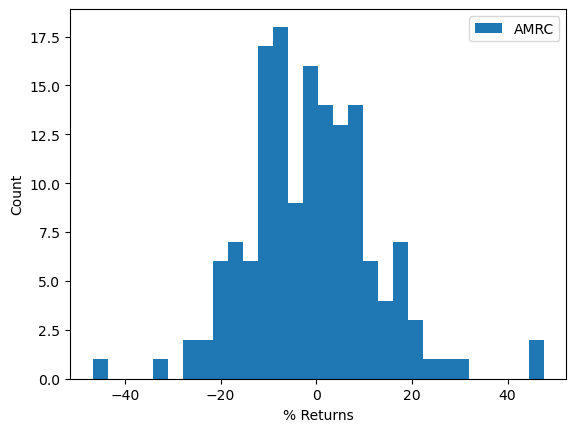

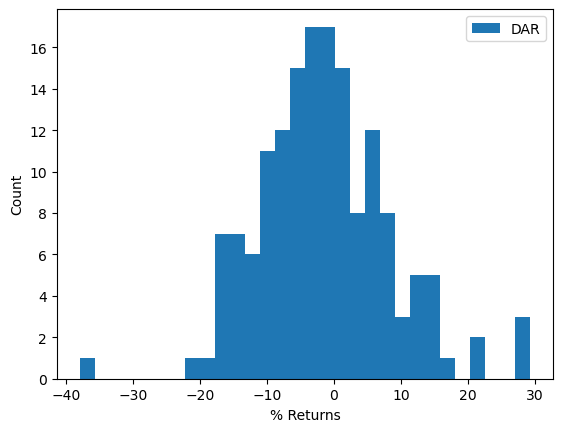

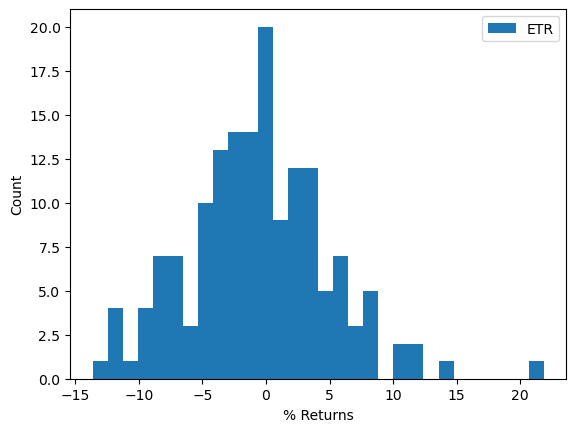

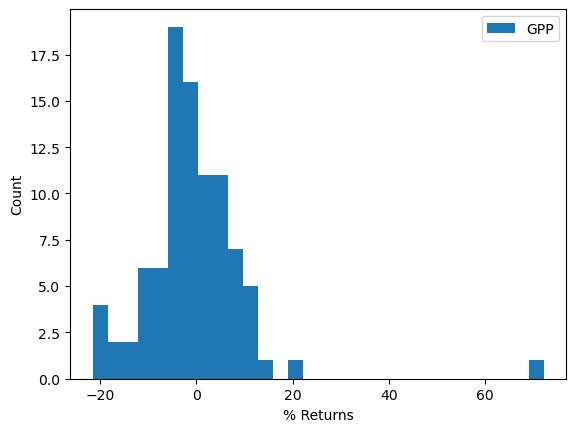

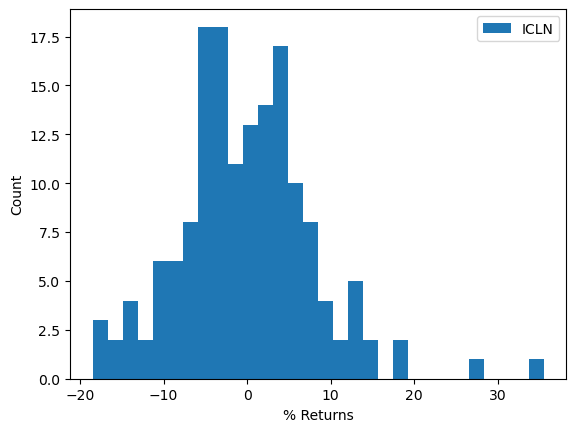

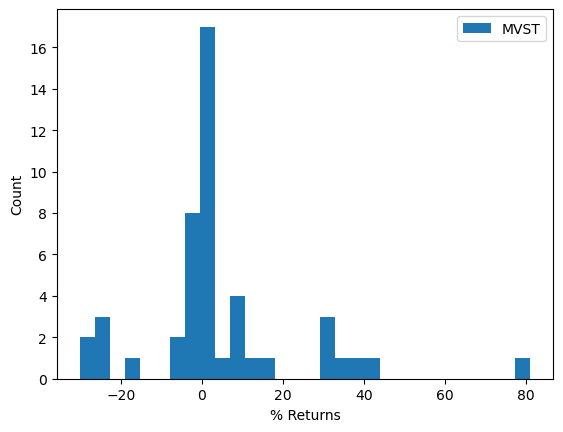

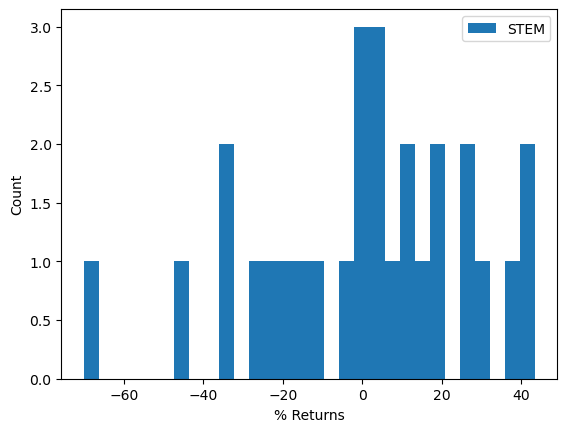

In [7]:
plot = False
plot = True
if plot == True:
    for i in hist_risk_ret.columns:
        plt.hist(hist_risk_ret[i]*100,bins=30,label = i)
        plt.xlabel("% Returns")
        plt.ylabel("Count")
        plt.legend()
        plt.show()
